#### Practical 06
#### Amitesh Jaiswal

#### Roll no. D1 - 27
#### Dataset - IOC

1. Understanding the problem

Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt

from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2. Collecting the Data
It has been downloaded from the site

https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data

In [2]:
# Read the IOC stock market data
ioc_dataset = pd.read_csv("IOC.csv")

ioc_dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN


In [3]:
# Selecting date and closing price columns
date_column = 'Date'
closing_price_column = 'Close'

# Selecting only the columns of interest
main_dataset = ioc_dataset[[date_column, closing_price_column]]

# Displaying the selected data
print(main_dataset)

            Date   Close
0     2000-01-03  270.85
1     2000-01-04  264.40
2     2000-01-05  261.30
3     2000-01-06  260.10
4     2000-01-07  264.45
...          ...     ...
5301  2021-04-26   88.20
5302  2021-04-27   88.85
5303  2021-04-28   89.40
5304  2021-04-29   88.90
5305  2021-04-30   90.85

[5306 rows x 2 columns]


In [4]:
main_dataset['Close'] = main_dataset['Close'].astype(float)


<ipython-input-4-b3f67d92a746>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_dataset['Close'] = main_dataset['Close'].astype(float)


In [5]:
main_dataset


,Date,Close
0,2000-01-03,270.85
1,2000-01-04,264.40
2,2000-01-05,261.30
3,2000-01-06,260.10
4,2000-01-07,264.45
...,...,...
5301,2021-04-26,88.20
5302,2021-04-27,88.85
5303,2021-04-28,89.40
5304,2021-04-29,88.90


###Trend

In [6]:
main_dataset = main_dataset.rename(columns={'Close': 'Price'})


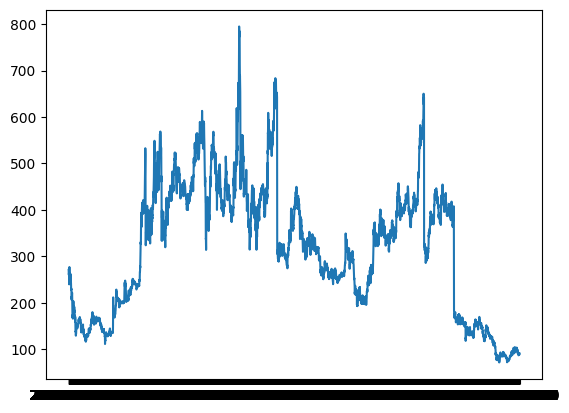

In [7]:
plt.plot(main_dataset.Date, main_dataset.Price)
plt.show()

3) Data Preprocessing
We use following steps to preprocess the available dataset.

Create new features from the available variables
Create target and predictor datasets
Scale the values in the datasets
Get the datasets into desired format and shape.
Split the dataset into train & test with appropriate ratio.

In [8]:
dataset = main_dataset
dataset = dataset.set_index('Date')
dataset = dataset['Price']

In [9]:
dataset=dataset.to_frame()
dataset['Price_MA2'] = dataset.expanding(min_periods=3).mean()

In [10]:
dataset['EMA'] = dataset.iloc[:,0].ewm(span=3, adjust=False).mean()

In [11]:
dataset = dataset[dataset['Price_MA2'].notna()]


In [12]:
dataset.head()


,Price,Price_MA2,EMA
Date,,,
2000-01-05,261.30,265.516667,264.462500
2000-01-06,260.10,264.162500,262.281250
2000-01-07,264.45,264.220000,263.365625
2000-01-10,251.35,262.075000,257.357813
2000-01-11,239.75,258.885714,248.553906


In [13]:
target = dataset[['Price']]
del dataset['Price']

In [14]:
x, y = dataset.values, target.values

In [15]:
x_scaled_set = MinMaxScaler()
y_scaled_set = MinMaxScaler()

X = x_scaled_set.fit_transform(x)
Y = y_scaled_set.fit_transform(y.reshape(-1,1))

In [16]:
x.shape


(5304, 2)

In [17]:
X_train_data = X[0:4000,]
y_train_data = Y[0:4000,]
X_test_data = X[4000:4690,]
y_test_data = Y[4000:4690,]

In [18]:
X_train_data.shape


(4000, 2)

In [19]:
y_test_data.shape


(690, 1)

In [20]:
X_train_data = X_train_data.reshape((-1,1,2))
X_test_data = X_test_data.reshape((-1,1,2))

4. Build Model using RNN & Grated Recurrent Unit (GRU)

In [21]:
GRU_model = Sequential()
GRU_model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(1, 2)))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(units=256))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(1, activation='sigmoid'))

In [22]:
GRU_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

5. Training the Dataset

In [23]:
GRU_model.fit(X_train_data, y_train_data, batch_size=250, epochs=100, validation_split=0.15, verbose=1)


Epoch 1/100
14/14 [==============================] - 13s 121ms/step - loss: 0.0393 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0204 - accuracy: 2.9412e-04 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0033 - accuracy: 2.9412e-04 - val_loss: 2.3325e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 2.9412e-04 - val_loss: 4.2607e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 0s 22ms/step - loss: 6.0835e-04 - accuracy: 2.9412e-04 - val_loss: 1.0904e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 0s 17ms/step - loss: 5.0396e-04 - accuracy: 2.9412e-04 - val_loss: 8.0902e-05 - val_accuracy: 0.0000e+00
Epoch 7/100
14/14 [==============================] - 0s 19ms/step - loss: 

6. Predict

In [24]:
score = GRU_model.evaluate(X_test_data, y_test_data)
print('Score: {}'.format(score))
y_pred = GRU_model.predict(X_test_data)
y_test_pred = y_scaled_set.inverse_transform(y_pred)
y_test_actual = y_scaled_set.inverse_transform(y_test_data)

22/22 [==============================] - 0s 3ms/step - loss: 4.0366e-04 - accuracy: 0.0000e+00
Score: [0.00040365970926359296, 0.0]
22/22 [==============================] - 1s 2ms/step


In [25]:
test_Dates = main_dataset.Date[4000:4690]

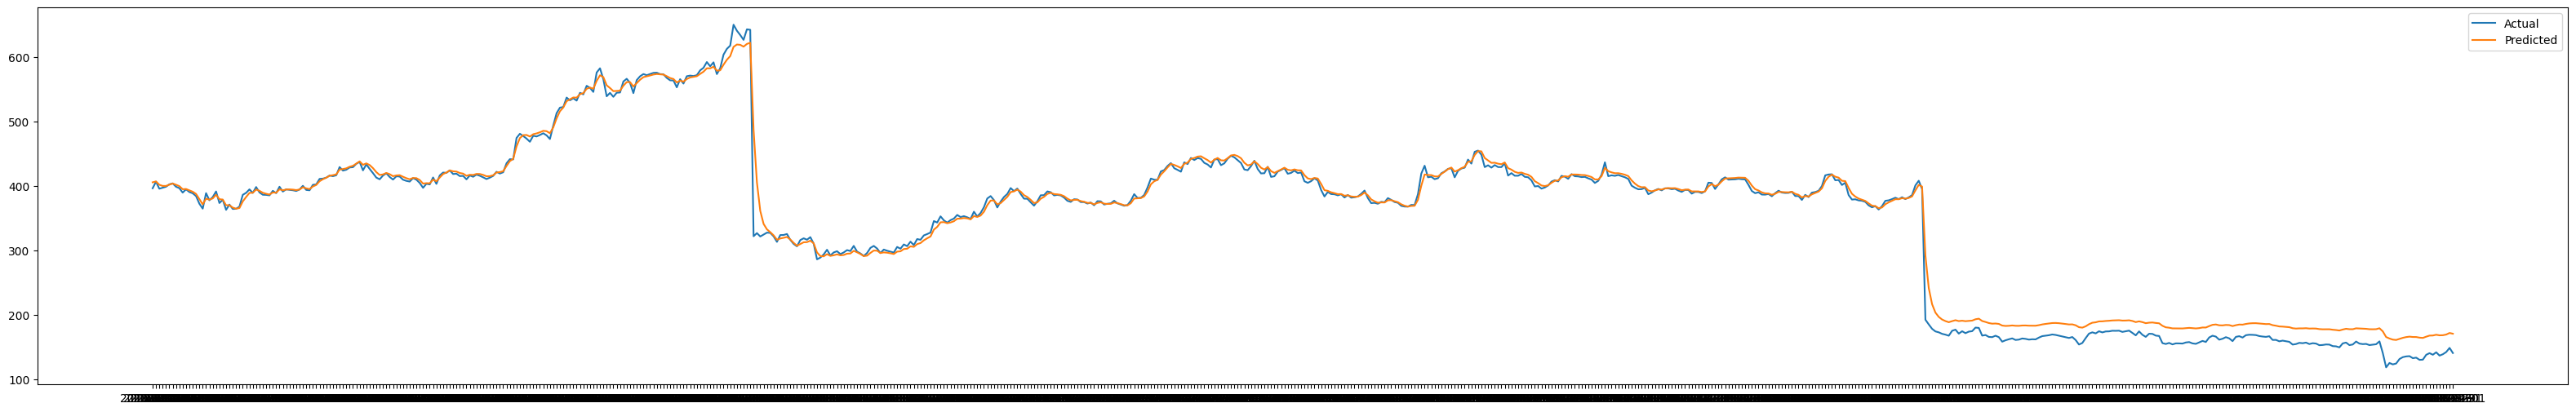

In [26]:
fig_size = (40, 6)
plt.figure(figsize=fig_size)
plt.plot(test_Dates, y_test_actual[-690:], label='Actual')
plt.plot(test_Dates, y_test_pred[-690:], label='Predicted')
plt.legend()
plt.show()


22/22 [==============================] - 0s 4ms/step


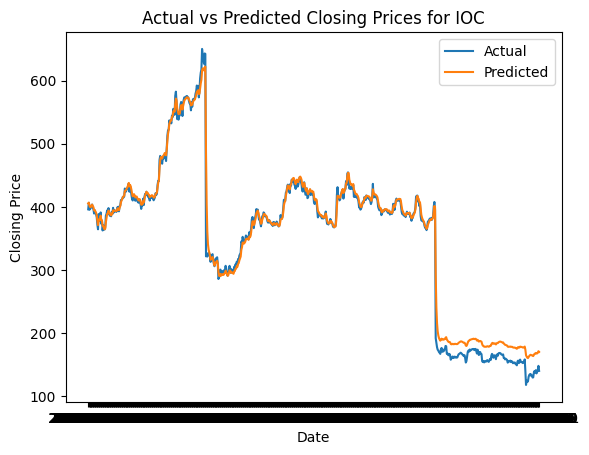

In [27]:
# Predict closing prices for the test data
y_pred = GRU_model.predict(X_test_data)

# Inverse transform the scaled predictions to get the actual closing prices
y_test_pred = y_scaled_set.inverse_transform(y_pred)

# Plot the actual and predicted closing prices against the dates for the test data
plt.plot(test_Dates, y_test_actual[-690:], label='Actual')
plt.plot(test_Dates, y_test_pred[-690:], label='Predicted')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices for IOC')
plt.legend()
plt.show()


The final plot illustrates the comparison between the actual and predicted closing prices of Indian Oil Corporation Limited (IOC) stock over a specified period. The actual closing prices, represented by the blue line, demonstrate the true market performance, while the predicted closing prices, shown in orange, are generated by a trained GRU (Gated Recurrent Unit) model. The model utilizes historical stock data to forecast future prices, offering insights into potential market trends. The close alignment between the actual and predicted values indicates the model's effectiveness in capturing the underlying patterns of IOC's stock price movement. This visualization serves as a valuable tool for investors and analysts, aiding in informed decision-making and risk management strategies.